In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit                        # popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray
from uncertainties import unumpy as unp 
import scipy.constants as const

Logarithmus des Dampfdruckes gegen reziproke absolute Temperatur:

\begin{tabular}{c c}
\toprule
{} &                Wert \\
\midrule
Steigung a        &  (-3.23+/-0.06)e+03 \\
Achsenabschnitt b &         8.47+/-0.17 \\
\bottomrule
\end{tabular}

L = (26814.142 +- 457.295)


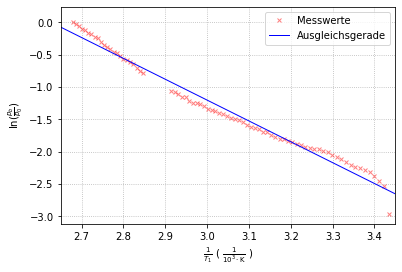

In [116]:
md_1bar = pd.read_csv('tables/md_1bar.csv')
np.savetxt('tables/ptief.txt', md_1bar.values, header='p_b(Pa) T1(K)', fmt='%.0f')

p, T = np.genfromtxt('tables/ptief.txt', unpack=True, skip_header=1)
p *= 100    # bar in Pa
T += 273.15     # C in K
rT = 1/(T*1e-3) # reziproke absolute Temperaturen in 10^-3 K^-1
p0 = 101300     # Umgebungsdruck am Anfang
x = rT
y = np.log((p/p0))
plt.plot(x, y, 'xr', markersize=4 , label = 'Messwerte', alpha=0.5)

# lineare Ausgleichsfunktion
def g(x, a, b):
    return a * x + b

para, pcov = curve_fit(g, rT, y)
pcov = np.sqrt(np.diag(pcov))
para = np.round(para, 3)
pcov = np.round(pcov, 3)
a, b = para
fa, fb = pcov  
R = 8.314462618

xx = np.linspace(2.6, 3.5)
plt.plot(xx, g(xx, a, b), '-b', linewidth = 1, label = 'Ausgleichsgerade')

plt.xlabel(r'$\frac{1}{T_{1}}$ ( $\frac{1}{10^3 \cdot\mathrm{K}}$ )')
plt.ylabel(r'ln($\frac{p_{b}}{p_{0}}$)')
plt.legend(loc="best")
plt.grid(linestyle='dotted')

plt.xlim(2.65, 3.45)
 
a *= 1000
fa *= 1000
para = a, b
pcov = fa, fb

dreg = {'Wert': unp.uarray(para, pcov)}
dfreg = pd.DataFrame(data = dreg, index = ['Steigung a', 'Achsenabschnitt b'])
print(dfreg.to_latex(index = True, column_format= "c c", decimal=','))

ba = -a*R
bfa =  fa*R 
L = ba
print('L = (%.3f +- %.3f)' % (ba, bfa))

L = ufloat(ba, bfa)

In [117]:
L_a = R * 373
L_i = L - L_a 
L_i /= 6.022e23 * 1.602e-19
print(L_i)

0.246+/-0.005


1.108
[1.108+/-0.341 -1263.432+/-441.923 487658.182+/-190320.526
 -63671226.474+/-27273955.995]


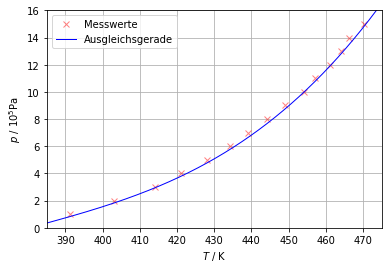

In [118]:
md_15bar = pd.read_csv('tables/md_15bar.csv')
np.savetxt('tables/phoch.txt', md_15bar.values, header='p_b(bar) T1(C)', fmt='%.0f')

p, T = np.genfromtxt('tables/phoch.txt', unpack=True, skip_header=1)
p *= 100000     # bar in Pa
T += 273.15     # C in K
x = T
y = p
plt.plot(x, y/1e5, 'xr', markersize=6 , label = 'Messwerte', alpha=0.5)

# Ausgleichsfunktion
def p(T, a, b, c, d):
    return a*T**3 + b*T**2 + c*T + d

para, pcov = curve_fit(p, T, y)
pcov = np.sqrt(np.diag(pcov))
para = np.round(para, 3)
pcov = np.round(pcov, 3)
a, b, c, d = para
fa, fb, fc, fd = pcov
print(a)

xx = np.linspace(380, 480, 10000)
plt.plot(xx, p(xx, a, b, c, d)/1e5, '-b', linewidth = 1, label = 'Ausgleichsgerade')

plt.xlabel(r'$T$ / $\mathrm{K}$')
plt.ylabel(r'$p$ / $10^5 \mathrm{Pa}$')
plt.legend(loc="best")
plt.grid(True)

plt.xlim(385, 475)
plt.ylim(0, 16)

params = uarray(para, pcov)
print(params)


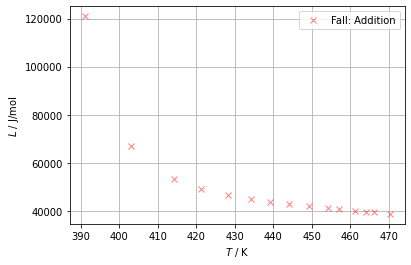

In [119]:
A = 0.9
def p(T):
    return a*T**3 + b*T**2 + c*T + d

def dp(T):
    return 3*a*T**2 + 2*b*T + c

def Lplus(T):
    return (T*dp(T)/p(T)) * ( (R*T/2) +  np.sqrt( (R*T/2)**2 - A*p(T) ) )

def Lminus(T):
    return (T*dp(T)/p(T)) * ( (R*T/2) -  np.sqrt( (R*T/2)**2 - A*p(T) ) )

x = T
y1 = Lplus(T)
y2 = Lminus(T)

plt.plot(x, y1, 'xr', markersize=6 , label = 'Fall: Addition', alpha=0.5)
plt.xlabel(r'$T$ / $\mathrm{K}$')
plt.ylabel(r'$L$ / $\mathrm{J/mol}$')
plt.legend(loc='best')
plt.grid(True)

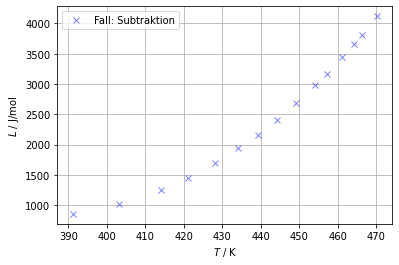

In [120]:
plt.plot(x, y2, 'xb', markersize=6 , label = 'Fall: Subtraktion', alpha=0.5)
plt.xlabel(r'$T$ / $\mathrm{K}$')
plt.ylabel(r'$L$ / $\mathrm{J/mol}$')
plt.legend(loc='best')
plt.grid(True)